# HW Review

## Table Constraints 

### Using Check Constraints 
```
CREATE TABLE parts (
    part_no VARCHAR(18) PRIMARY KEY,
    description VARCHAR(40),
    cost DECIMAL(10,2 ) NOT NULL CHECK (cost >= 0),
    price DECIMAL(10,2) NOT NULL CHECK (price >= 0)
);
```
Take a look at the structure
```
SHOW CREATE TABLE parts;
```

Try inserting a value that violates the constraint 
```
INSERT INTO parts(part_no, description,cost,price) 
VALUES('A-001','Cooler',0,-100);
```
This will throw an error


So let's recreate the table
```
drop table if exists parts;
```



Now let's try adding another table constraint
```
CREATE TABLE parts (
    part_no VARCHAR(18) PRIMARY KEY,
    description VARCHAR(40),
    cost DECIMAL(10,2 ) NOT NULL CHECK (cost >= 0),
    price DECIMAL(10,2) NOT NULL CHECK (price >= 0),
    CONSTRAINT parts_chk_price_gt_cost 
        CHECK(price >= cost)
);
``` 

take a look at the structure of the table
```
SHOW CREATE TABLE parts;
```

once again insert a value that violates the constraint
```
INSERT INTO parts(part_no, description,cost,price) 
VALUES('A-001','Cooler',200,100);
```

In [7]:


import mysql.connector
from dotenv import dotenv_values

config = dotenv_values(".env")  

mydb = mysql.connector.connect(
  host=config['HOST'],
  user=config['USER'],
  password=config['PASSWORD'],
  database=config['DATABASE'])

mycursor = mydb.cursor()

mycursor.execute('Create Database If Not Exists PartData;')

mycursor.execute('Use PartData;')

# mycursor.execute('Drop Table If Exists parts;')

mycursor.execute('''CREATE TABLE parts (
    part_no VARCHAR(18) PRIMARY KEY,
    description VARCHAR(40),
    cost DECIMAL(10,2 ) NOT NULL CHECK (cost >= 0),
    price DECIMAL(10,2) NOT NULL CHECK (price >= 0)
);''')






mydb.commit()
# mycursor.executemany('Select * From "list_name"')
# for x in mycursor:
#   print(x)
mydb.close()

### unique constraints
```
CREATE TABLE suppliers (
    supplier_id INT AUTO_INCREMENT,
    name VARCHAR(255) NOT NULL,
    phone VARCHAR(15) NOT NULL UNIQUE,
    address VARCHAR(255) NOT NULL,
    PRIMARY KEY (supplier_id),
    CONSTRAINT uc_name_address UNIQUE (name , address)
);
```

insert a value into the table 

```
INSERT INTO suppliers(name, phone, address) 
VALUES( 'ABC Inc', 
       '(408)-908-2476',
       '4000 North 1st Street');
```

insert another value that violates the unique constraint

```
INSERT INTO suppliers(name, phone, address) 
VALUES( 'XYZ Corporation','(408)-908-2476','3000 North 1st Street');
```

so change the phone number 
```
INSERT INTO suppliers(name, phone, address) 
VALUES( 'XYZ Corporation','(408)-908-3333','3000 North 1st Street');
```
Show the values of the table 
```
SELECT * FROM suppliers;
```

```
INSERT INTO suppliers(name, phone, address) 
VALUES( 'ABC Inc', 
       '(408)-908-1111',
       '4000 North 1st Street');
```

How to drop a a key 
```
DROP INDEX uc_name_address ON suppliers;
```

How to view the constraint
```
SHOW INDEX FROM suppliers;
```

Adding a new unique constraint programmatically

```
ALTER TABLE table_name
ADD CONSTRAINT constraint_name 
UNIQUE (column_list);
```

## SQL Views

Usually when you write complicated sql queries you need to save them in an sql file and open them to use them again. Views alleviate the need to do that by allowing you to save queries within the database. A view is a named query stored in the database catalog.



**Example:** let's say we write the following query on some tables in Chinook. 
```
Use Chinook;
SELECT 
    Concat(LastName,",",FirstName) as "Full Name",  
    BillingCity, 
    InvoiceDate, 
    Total
FROM
    Customer
INNER JOIN
    Invoice USING (customerId);
```


Running the query above we get the following result
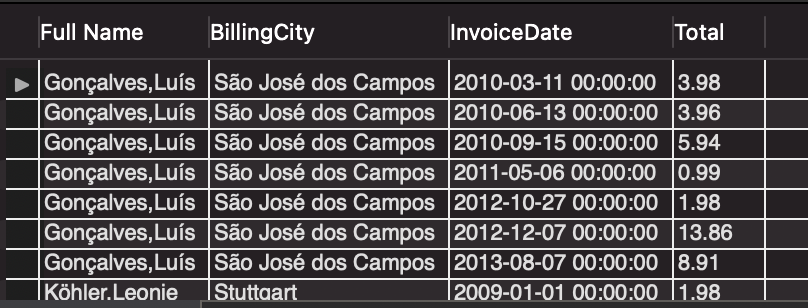


### Create View

So in order to save the following query in a view we use the VIEW keyword:


```
CREATE VIEW customerPayments
AS 
SELECT 
    Concat(LastName,",",FirstName) as "Full Name",  
    BillingCity, 
    InvoiceDate, 
    Total
FROM
    Customer
INNER JOIN
    Invoice USING (customerId);
```
the CREATE VIEW keywords store the view customerPayments in the database catalogue 

So now this lets us do the following to get the same result: 

```
SELECT * FROM customerPayments;
```

### Create or Replace 

let's say your boss tells you that we want to protect the location of where the customers or located
We can updated our view by removing the billingCountry


```
CREATE or REPLACE VIEW customerPayments
AS 
SELECT 
    Concat(LastName,",",FirstName) as "Full Name",   
    InvoiceDate, 
    Total
FROM
    Customer
INNER JOIN
    Invoice USING (customerId);
```
the CREATE VIEW keywords store the view customerPayments in the database catalogue 

## Creating a view containing a subquery example

What do you think the view below does?

```
CREATE VIEW aboveAvgTotals AS
    SELECT 
        InvoiceId, 
        BillingAddress, 
        Total
    FROM
        Invoice
    WHERE
        Total > (
            SELECT 
                AVG(Total)
            FROM
                Invoce)
    ORDER BY Total DESC;

```

## Using WITH CHECK OPTION clause on views for consistency

The WITH CHECK OPTION is an optional clause of the CREATE VIEW statement. The WITH CHECK OPTION prevents a view from updating or inserting rows that are not visible through it. In other words, whenever you update or insert a row of the base tables through a view, MySQL ensures that the insert or update operation is conformed with the definition of the view. 

```
CREATE [OR REPLACE VIEW] view_name 
AS
  select_statement
  WITH CHECK OPTION;
```
**Example** : First, create a view named sales based on the employees table to reveal employees whose job titles contain Sales e.g., Sales Manager, Sales Support Agent. 

```
CREATE OR REPLACE VIEW sales_peeps AS
    SELECT 
		employeeId,
		FirstName,
        LastName,
		Title,
		Email,
		PostalCode
	FROM
		employee
	WHERE
		Title LIKE '%Sales%';
```

run select on view to make sure it works 
```
SELECT * FROM sales_peeps;
```

insert a row 

```
INSERT INTO sales_peeps(
    employeeId,
    firstName,
    lastName,
    Title,
    email,
    PostalCode
) 
VALUES(
    1703,
    'Lily',
    'Bush',
    'IT Support',
    'lilybush@classicmodelcars.com',
    1002
);
```
Notice that the newly created employee is not visible through the vps view because her job title is IT Manager, which is not the VP

```
SELECT 
   * 
FROM 
   employees
ORDER BY 
   employeeNumber DESC;
```

So now let's try it with WITH CHECK OPTION
```
CREATE OR REPLACE VIEW sales_peeps AS
    SELECT 
		employeeId,
		FirstName,
        LastName,
		Title,
		Email,
		PostalCode
	FROM
		employee
	WHERE
		Title LIKE '%Sales%';
WITH CHECK OPTION;
```


Now try inserting again 


```


INSERT INTO sales_peeps(
    employeeId,
    firstName,
    lastName,
    Title,
    email,
    PostalCode
) 
VALUES(
    1704,
    'John',
    'Doe',
    'IT Support',
    'JohnDoe@classicmodelcars.com',
    1002
);

```


however if we change our insert to respect our constraint 
```
INSERT INTO sales_peeps(
    employeeId,
    firstName,
    lastName,
    Title,
    email,
    PostalCode
) 
VALUES(
    1704,
    'John',
    'Doe',
    'Sales Manager',
    'JohnDoe@classicmodelcars.com',
    1002
);

```

Now check

```
SELECT * FROM sales_peeps;
```

## Other useful view commands 
```
DROP VIEW customerPayments; -- drops a view
SHOW TABLES; -- to see all tables, you will also see views  
SHOW FULL TABLES; -- in order to distinguish between views and tables
```

## Exercises


VIEWS:
- Write an SQL query that finds all the customer info and sorts it by alphabetically by country save this query as a view 
- update the view to remove sensitive customer information, such as address, name etc. (update the view using REPLACE) 

TABLE Constraints
- Use unique to alter our world data table to make sure one country cannot be inserted twice 
- Use check to alter out world data table ot make sure a country has to have a population and landmass  larger than 0 to be added to the table.

Additional SQL Practice 
- Sort data by the longest capital names. 
- Sort data by the shortest country names. 
- find the total population of all two word countries 
- find the total population of all three word countries

In [29]:
'''A palindrome is a string that reads the same forwards as it does backwords
i.e.
racecar
toot
Write a function that checks if a string is a palindrome. If the length is even, print "even lengthed palindrome" if the length is odd print "odd lengthed palindrome"'''



def is_palindrome(string = ''):
    str_half_even = int(len(string)/2)
    str_half_odd = (round(len(string)/2))-1
    str_reversed = string[::-1]
    if len(string) % 2 == 0 and string[:str_half_even] == str_reversed[:str_half_even]:
        return "even lengthed palindrome" #length is even
    elif len(string) % 2 != 0 and string[:str_half_odd] == str_reversed[:str_half_odd]:
        return "odd lengthed palindrome"
    return "this string is not a palindrome"

print(is_palindrome("toot"))
print(is_palindrome('racecar'))
    
   

    

        

even lengthed palindrome
odd lengthed palindrome


In [17]:
print(type(round(7/2)-1))


<class 'int'>
